#  Grafos y redes de transporte

## Clase 4: Análisis y construcción de una red.

### Una aproximación a la teoría de grafos

![informacion](../imagenes/grafos_introduccion.png)

## Introducción 

Con esta clase, abrimos un nuevo capítulo. En el transcurso de este módulo nos dedicaremos exclusivamente a recorrer un conjunto de conceptos que hacen al trabajo y análisis con redes de transporte. Para ello, tomaremos un caso de estudio y lo utilizaremos como base para aplicar los fundamentos principales de la teoría de grafos. 

Nos apoyaremos en sus nociones básicas para describir el funcionamiento de una red de transporte, apelando también a librerías desarrolladas en python para el manejo de información estructurada en nodos conectados por una serie de arcos. 

Revisaremos las distintas métricas de una red para evaluar el alcance territorial de un sistema de transporte, su accesibilidad, las franjas horarias de mayor uso, entre otras.

Así es que llegamos a la **propuesta para esta clase**. Nos descargaremos los [datasets de recorridos realizados](https://data.buenosaires.gob.ar/dataset/bicicletas-publicas) en la red de bicicletas públicas de la Ciudad de Buenos Aires (no te olvides de poner los archivos en la carpeta `data`), estructuraremos un grafo donde las estaciones serán los nodos y y los viajes los arcos que los conectan. 

**Esto lo desarrollaremos en X partes o secciones**:
**1)** *Titulo*
**2)** *Titulo*

Pero antes, comencemos por construir una descripcíón más general de nuestro objeto de estudio. ¿Qué cantidad de usuarios tiene la red de bicicletas públicas? ¿Quiénes son los usuarios más frecuentes? ¿En qué momento del día se usa más el servicio?¿Qué zonas de la ciudad conecta?...arremanguemonos y exploremos nuestros datos!

### Ecobici, la red de bicicletas públicas

![informacion](../imagenes/ecobici.png)

In [1]:
# Manipular de datos
import pandas as pd
import numpy as np

Los datasets que están disponibles, van del año 2015 al 2019, para no tener que cargar uno por uno, usemos un diccionario y carguemos todos los df de una sola vez. No son datasets livianos, por lo que pueden tardar unos segundos.

In [2]:
# construyamos el path de cada uno en base al año
paths = ['../data/bici{}_cdn.csv'.format(str(y)) for y in range(15,20)]

# u guardemos cada df bajo una key
df = {}
for p in paths:
    df[p[12:14]] = pd.read_csv(p)

In [3]:
# Por ejemplo, nuestro primer año de la serie, 2015...
df['15'].head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,134224.0,2015-12-31 20:30:05,14.0,Aduana,3,Tribunales,11.0,MASCULINO,71.0
1,134224.0,2015-12-31 19:58:37,25.0,Retiro,2,Aduana,3.0,MASCULINO,71.0
2,222555.0,2015-12-31 18:42:54,57.0,Congreso,8,Retiro,2.0,MASCULINO,26.0
3,11504.0,2015-12-31 17:55:29,15.0,Plaza Almagro,17,Congreso,8.0,MASCULINO,26.0
4,183241.0,2015-12-31 16:59:29,24.0,Plaza Almagro,17,Plaza Almagro,17.0,FEMENINO,59.0


In [4]:
# Un poco de información adicional
df['15'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503867 entries, 0 to 503866
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bici_id_usuario               503867 non-null  float64
 1   bici_Fecha_hora_retiro        503867 non-null  object 
 2   bici_tiempo_uso               495440 non-null  float64
 3   bici_nombre_estacion_origen   503867 non-null  object 
 4   bici_estacion_origen          503867 non-null  int64  
 5   bici_nombre_estacion_destino  495440 non-null  object 
 6   bici_estacion_destino         495440 non-null  float64
 7   bici_sexo                     503867 non-null  object 
 8   bici_edad                     503867 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 34.6+ MB


Ahora hagamos algunos gráficos para entender con qué estamos trabajando, por ejemplo...cuál es la edad de los usuarios del sistema de ecobici?

In [5]:
# Importamos algunas librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a apelar al método `subplot` de matplotlib para dividir la pantalla en filas y columnas y poder ver cada años por separado. Si hacen `Shift`+`tab` * 2 adentro del método verán que cuentan con una breve descripción.

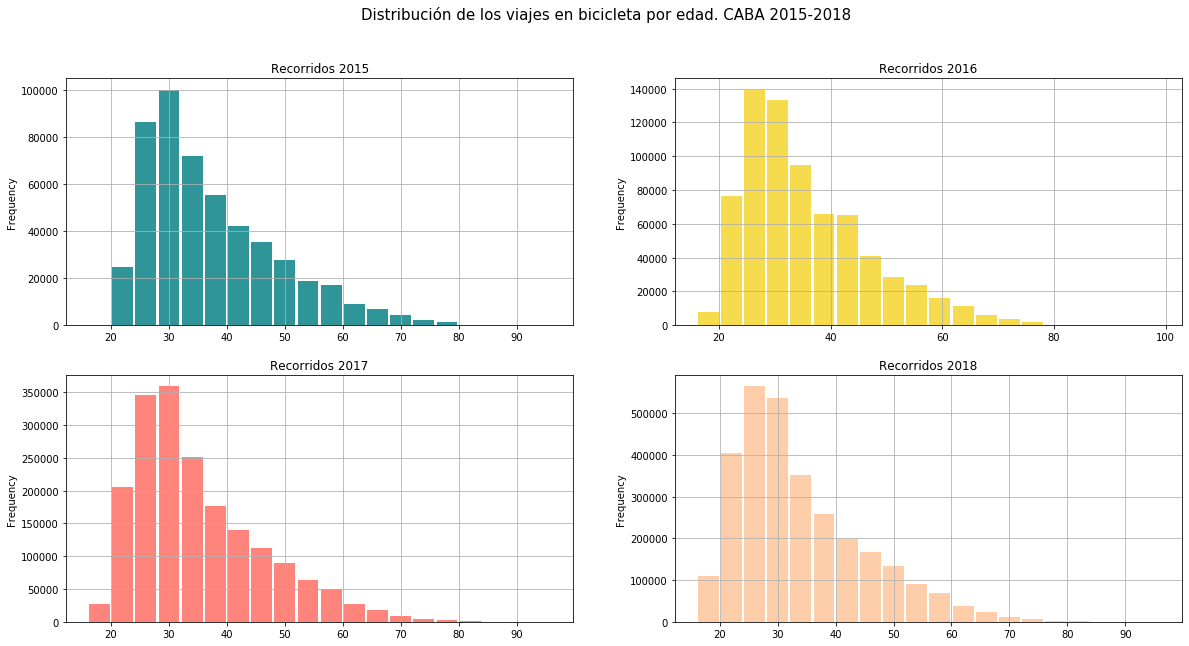

In [6]:
# Graficamos un histograma por año para ver cantidad de casos por edad
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
viajes15 = df['15'].bici_edad
viajes15.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#2F9599')
plt.title('Recorridos 2015')

plt.subplot(2,2,2)
viajes16 = df['16'].bici_edad
viajes16.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#F7DB4F')
plt.title('Recorridos 2016')

plt.subplot(2,2,3)
viajes17 = df['17'].bici_edad
viajes17.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#FF847C')
plt.title('Recorridos 2017')

plt.subplot(2,2,4)
viajes18 = df['18'].bici_edad
viajes18.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#FECEAB')
plt.title('Recorridos 2018')

plt.suptitle('Distribución de los viajes en bicicleta por edad. CABA 2015-2018', fontsize=15);

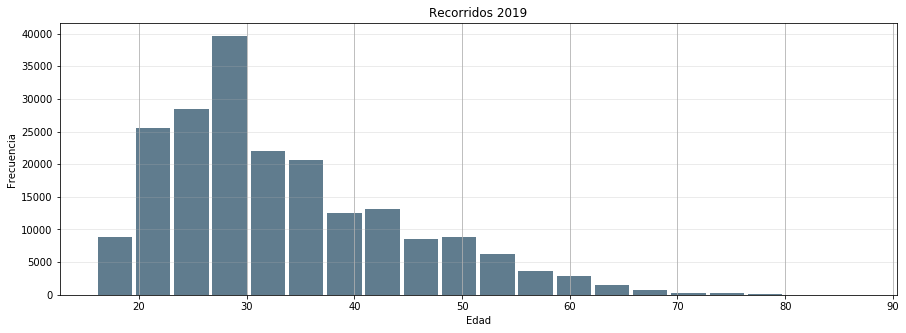

In [7]:
# ... y ahora el último año disponible
viajes19 = df['19'].bici_edad
viajes19.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(15,5))
plt.title('Recorridos 2019')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3);

Un patrón que podemos ver en todos los años es una distribución con un claro sesgo a la izquierda. Es decir, que estamos frente a un medio de movilidad donde el usuario frecuente suele estar en torno a los 30 años de edad. Y qué pasa con el género?

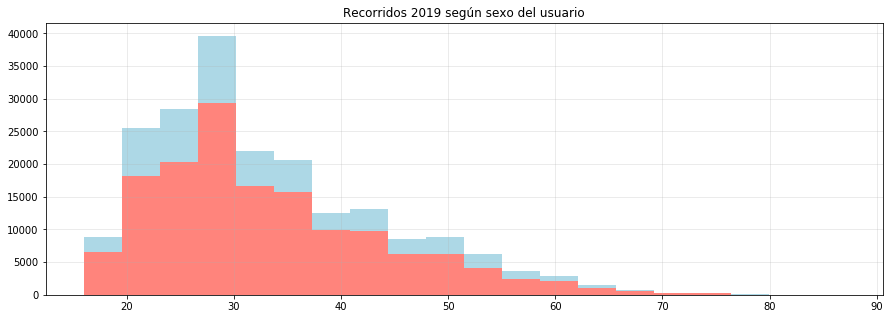

In [8]:
# Diferencias de uso por genero (2019)
edad = df['19'].bici_edad
sexo = df['19'].bici_sexo

plt.figure(figsize=(15,5))
plt.hist([[e for e, s in zip(edad, sexo) if s=='MASCULINO'], 
          [e for e, s in zip(edad, sexo) if s=='FEMENINO']], 
          color=['#FF847C','#ADD8E6'], bins=20, stacked=True)
plt.grid(alpha=0.3)
plt.title('Recorridos 2019 según sexo del usuario')
plt.show();

Lo que podemos ver ahora es que, al menos para el año 2019 los usuarios son mayormente hombres. Se animan a comprobar si este patrón se reproduce en otros años?

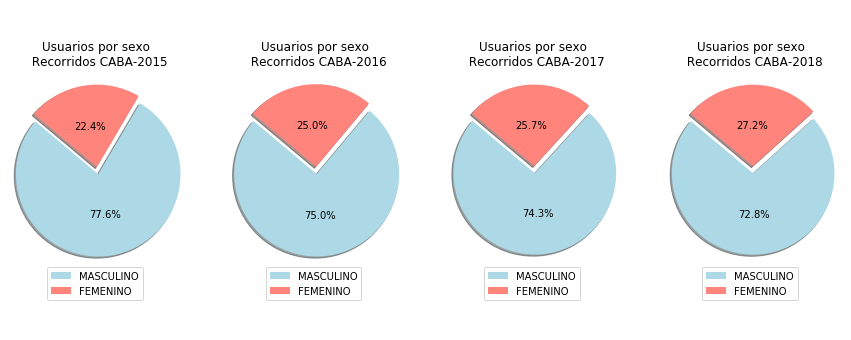

In [9]:
# Estilos
explode = (0.09, 0) 
colors = ['#ADD8E6', '#FF847C']
labels = ['MASCULINO', 'FEMENINO']


# Plot 1
sizes = [df['15'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
         df['15'].groupby(['bici_sexo'])['bici_edad'].count()[0]]

# Plot 2
sizes2 = [df['16'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
          df['16'].groupby(['bici_sexo'])['bici_edad'].count()[0]]

# Plot 3
sizes3 = [df['17'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
          df['17'].groupby(['bici_sexo'])['bici_edad'].count()[0]] 

# Plot 4
sizes4 = [df['18'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
          df['18'].groupby(['bici_sexo'])['bici_edad'].count()[0]]
 
# Grilla de plots
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
plt.pie(sizes, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
 
plt.legend(labels, loc=(0.22,0.1))
plt.axis('equal')
plt.title('Usuarios por sexo \n Recorridos CABA-2015', y=0.8)

plt.subplot(1,4,2)
plt.pie(sizes2, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2016', y=0.8)
plt.axis('equal')

plt.subplot(1,4,3)
plt.pie(sizes3, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2017', y=0.8)
plt.axis('equal')

plt.subplot(1,4,4)
plt.pie(sizes4, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2018', y=0.8)
plt.axis('equal')
plt.show();

Esta es otra forma de constatar lo que vimos en nuestros histogramas. Cuando tenemos pocas categorías, los gráficos de torta también son una buena alternativa para ver cómo se distribuyen los valores de una variable. Hasta ahora, sabemos que la mayoría de los usuarios son varones jóvenes.

Y...¿en qué momento del día es cuando más se utiliza el servicio?

In [10]:
from datetime import datetime

In [11]:
# Función para devolver columna de fecha y hora
def fecha_hora(df):
    '''
    Separa la informacion de fecha y hora que en todos los df estan juntas como string
    
    Argumentos
    ----------
    
    df: el dataframe de cada año de recorridos de bicis
    '''
    
    # Se splitea la columna en dos: fecha y hora que en todos los df estan juntas como str
    fecha_hora = df['bici_Fecha_hora_retiro'].str.split(' ', expand=True)
    
    # Se almacena en un nuevo df
    fecha_hora.columns = ['Fecha','Hora']
    
    return fecha_hora

In [12]:
# Función para devolver dia de la semana
def obtener_dia_semana(fecha):
    '''
    Devuelve el dia de la semana a partir de la fecha
    
    Argumentos
    ----------
    
    fecha: columna del df, para usarla hay que mapearla porque strptime no toma series 
    '''
    return datetime.strptime(fecha,'%Y-%m-%d').weekday()

Veamos cómo podríamos aplicar ambas funciones. Inicialmente podríamos...

In [13]:
# 1) instanciar las columnas de fecha y hora 
tiempo19 = fecha_hora(df['19'])

# 2) y a partir de la Fecha obtener el dia de la semana mapeando la última función
dia19 = tiempo19.Fecha.map(obtener_dia_semana)

In [14]:
type(dia19)

pandas.core.series.Series

In [15]:
# Podemos crear una copia de nuestro dataframe para seguir trabajando sobre un objeto nuevo
df19b = df['19'].copy()

In [16]:
# Creamos una función para acomodar un poco más nuestra información y mosrtar el día de la semana
def nombre_dia(serie):
    '''
     Reemplaza numero de dia por nombre
    
    Argumentos
    ----------
    serie: pd.Series()
    '''
    dia = serie.replace({0:'lunes', 
                         1:'martes', 
                         2:'miercoles', 
                         3:'jueves', 
                         4:'viernes', 
                         5:'sabado', 
                         6:'domingo'})
    return dia

In [17]:
# Dias de la semana
df19b['dia_semana'] = nombre_dia(dia19)

In [18]:
# Hora del dia
df19b['hora_dia'] = tiempo19.Hora

Ahora, en base a esta información podemos clasificar los distintos momentos del día y así construir una variable categórica que nos simplifique un poco la manera de visualizar nuestros datos.

In [19]:
# Funcion para clasificar el momento del dia. Se pueden cambiar los horarios si resulta arbitrario
def momento_dia(x):
    '''
     Clasifica momentos del día según un horario predefinido.
    
     Argumentos
     ----------
     x: str
    '''
    
    if (x['hora_dia']>= '07:00:00') & (x['hora_dia']<= '11:30:00'):
        return '1.Mañana'
    
    if (x['hora_dia']>='11:30:00') & (x['hora_dia'] <= '14:30:00'):
        return '2.Mediodia'
    
    if (x['hora_dia']>'14:30:00') & (x['hora_dia'] < '17:00:00'):
        return '3.Media tarde'
    
    if (x['hora_dia']>='17:00:00') & (x['hora_dia'] <= '19:00:00'):
        return '4.Tarde'
    
    if (x['hora_dia']>'19:00:00') & (x['hora_dia'] <= '21:00:00'):
        return '5.Tarde noche'
    
    if (x['hora_dia']>'21:00:00') & (x['hora_dia'] <= '24:00:00'):
        return '6.Noche'
    
    if (x['hora_dia']>'24:00:00') & (x['hora_dia'] < '07:00:00'):
        return '7.Madrugada'

Este es un buen ejemplo de cómo aplicar una función regular a partir de una anónima. Fíjense que lo que estamos pasando como argumento (nuestra `x`) no es otra cosa que cada fila de nuestra serie:

In [20]:
momento_dia = df19b.apply(lambda x: momento_dia(x),1)

In [21]:
df19b['momento_dia'] = momento_dia

Veamos ahora de qué manera podemos visualizar esta nueva información, por ejemplo, veamos la cantidad de varones y mujeres en los distintos momentos del día...

In [22]:
# Agrupamos la cantidad de casos
sexo_dia = df19b.groupby(['momento_dia','bici_sexo'])[['bici_sexo']].count()

In [23]:
sexo_dia.columns = ['Cantidad']

In [24]:
sexo_dia = sexo_dia.reset_index()

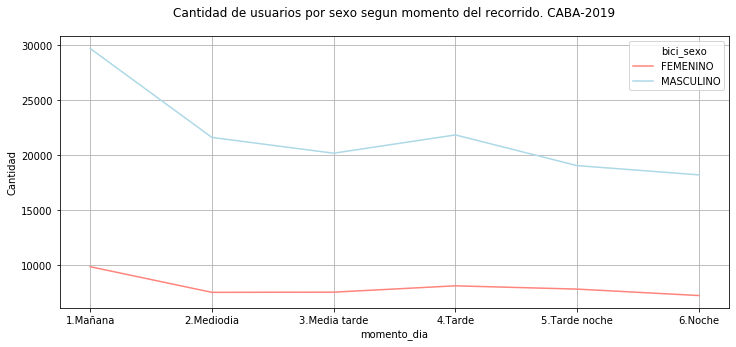

In [25]:
# ... y ploteamos
plt.figure(figsize=(12,5))
ax = sns.lineplot(x="momento_dia", y="Cantidad", hue='bici_sexo', 
                  data=sexo_dia.loc[sexo_dia['bici_sexo']!='NO INFORMADO'], palette = ['#FF847C','#ADD8E6'])
ax.set_facecolor("white")
plt.title('Cantidad de usuarios por sexo segun momento del recorrido. CABA-2019', y=1.05)
plt.grid()

Otra información que podría ser relevante sobre nuestro dataframe es la ubicación de nuestras estaciones. No solamente por la cuestión geográfica en sí, sino también como una forma de constatar cuan completo está nuestro set de datos. Representa en su totalidad la red de bicicletas o hay información con la que no contamos? Veámoslo,

In [26]:
# Total de estaciones de origen
len(df19b.bici_nombre_estacion_origen.unique())

170

In [27]:
# Total de estaciones de destino
len(df19b.bici_nombre_estacion_destino.unique())

171

In [28]:
# Geolocalizacion
import geopandas as gpd
import mplleaflet

Ahora sí veamos su ubicación geográfica, para eso nos vamos a descargar el shapefile de `Estaciones de Bicicletas` disponible en [Buenos Aires Data](https://data.buenosaires.gob.ar/dataset/estaciones-bicicletas-publicas) 

In [29]:
# Shape de estaciones descargados de DataBA
estaciones = gpd.read_file('../carto/estaciones_de_bicicletas.shp')

In [30]:
# ya podemos ver una primera diferencia, tenemos más estaciones que en nuestro último df
len(estaciones.NOMBRE.unique())

199

Lo que vamos a hacer ahora es tratar de asignarle valores a cada estación. En nuestro caso, cantidad de viajes...

In [31]:
# Creamos la cantidad total de viajes en estaciones de origen y destino
origen = df['19'].groupby(['bici_nombre_estacion_origen'])[['bici_sexo']].count().reset_index()
destino = df['19'].groupby(['bici_nombre_estacion_destino'])[['bici_sexo']].count().reset_index()

In [32]:
# ... y lo mergeamos con nuestro shape de estaciones
origen_map = pd.merge(estaciones,origen, left_on='NOMBRE', right_on='bici_nombre_estacion_origen')
destino_map = pd.merge(estaciones,destino, left_on='NOMBRE', right_on='bici_nombre_estacion_destino')

In [33]:
# Así vemos el total de viajes para 2019 en estaciones de ORIGEN
fig, ax = plt.subplots(1, figsize = (8,8))
ax.set_axis_off()
origen_map.to_crs(4326).plot(ax=ax,marker='o', color='#FF847C', markersize=origen_map['bici_sexo']/20)

mplleaflet.display(fig=ax.figure)

/home/federico/CoDeAr/curso-python-data/Clase 7/venv/lib/python3.6/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [34]:
# y de DESTINO
fig, ax = plt.subplots(1, figsize = (8,8))
ax.set_axis_off()
destino_map.to_crs(4326).plot(ax=ax,marker='o', color='#2F9599', markersize=destino_map['bici_sexo']/20 )
mplleaflet.display(fig=ax.figure)

/home/federico/CoDeAr/curso-python-data/Clase 7/venv/lib/python3.6/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [35]:
# Cargamos el shp radios censales de caba simplemente para tener como layer de base
caba = gpd.read_file('../carto/radios.geojson')

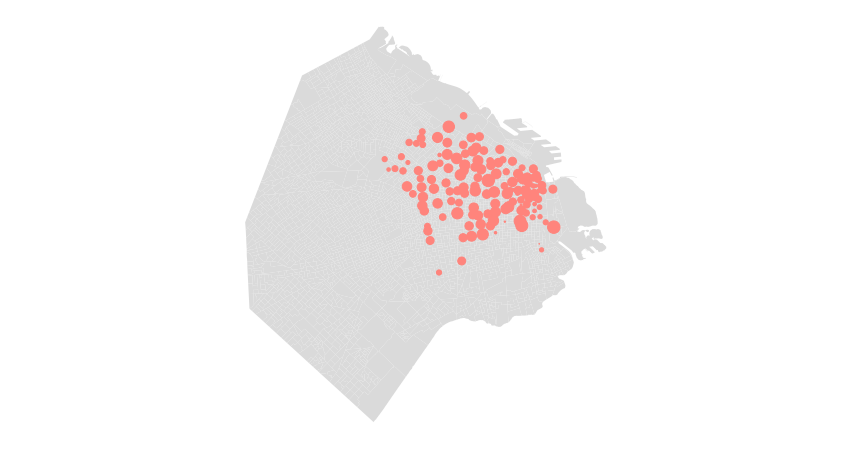

In [36]:
f, ax = plt.subplots(1,figsize=(15,8))
caba.to_crs(crs=origen_map.crs).plot(ax=ax, color='#dadada')
origen_map.plot(ax=ax,marker='o', color='#FF847C', markersize=origen_map['bici_sexo']/20 )
plt.axis('equal')
ax.set_axis_off()

Por último, veamos si el uso de las bicicletas registra algún horario de uso intensivo. No perdamos de vista que todavía seguimos anaizando nuestro datos de manera agregada. Todavía no hemos elegido un día en concreto. Esto lo hacemos como una primera aproximación, más bien general, que nos permita cierta familiaridad con nuestros datos. Algo así como tener un primer pantallazo.

Armamos entonces una con usuarios totales por hora de retiro. Esto nos va a permitir armar una `heat table` con las distintas horas del día y los retiros registrados. 

In [37]:
# Horas en eje x: Cantidad de retiros por hora segun dia de la semana
pivot1 = pd.pivot_table(df19b, values="bici_sexo",index=pd.to_datetime(df19b.bici_Fecha_hora_retiro).dt.weekday, 
               columns=pd.to_datetime(df19b.bici_Fecha_hora_retiro).dt.hour, aggfunc = 'count',fill_value=0)

# Horas en eje y
pivot2 = pd.pivot_table(df19b, values="bici_sexo",index=pd.to_datetime(df19b.bici_Fecha_hora_retiro).dt.hour, 
               columns=["dia_semana"], aggfunc = 'count',fill_value=0)

In [38]:
# Acá se ve con claridad la matriz que armamos, la que también podría haberse compeltado con otros valores
pivot1

bici_Fecha_hora_retiro,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
bici_Fecha_hora_retiro,,,,,,,,,,,,,,,,,,,,,
0,790,551,313,175,133,346,659,1199,1535,1325,...,1859,1893,2035,2589,2836,2481,2089,1782,1249,928
1,917,586,319,188,166,412,811,1523,1732,1421,...,1784,1774,1932,2101,2245,2018,1957,1662,1142,905
2,919,647,369,195,161,452,823,1589,2142,1739,...,1828,1778,2144,2476,2696,2510,2145,1804,1278,1093
3,1026,752,393,219,217,390,759,1453,1881,1634,...,1819,1857,2201,2645,3135,2620,2294,1916,1406,1156
4,1138,781,413,253,189,360,789,1584,1990,1534,...,1581,1706,2129,2497,2659,2264,2041,1591,1249,944
5,995,820,699,476,356,357,503,706,855,909,...,1231,1199,1172,1079,1069,1211,1174,1064,885,776
6,789,704,527,374,323,362,476,434,425,372,...,696,821,916,944,988,1059,1013,986,841,794


In [39]:
pivot2.head()

dia_semana,domingo,jueves,lunes,martes,miercoles,sabado,viernes
bici_Fecha_hora_retiro,,,,,,,
0,789,1026,790,917,919,995,1138
1,704,752,551,586,647,820,781
2,527,393,313,319,369,699,413
3,374,219,175,188,195,476,253
4,323,217,133,166,161,356,189


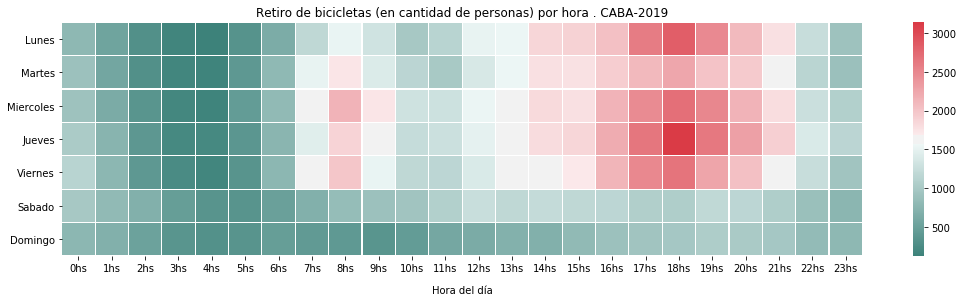

In [40]:
# Graficamos un heatmap con el pivot1
plt.figure(figsize=(15,4))
ax = sns.heatmap(pivot1, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=360 )

# Eje x
ax.set_xlabel("Hora del día", labelpad = 12)
labels = [item.get_text()+''+'hs' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# Eje y
ax.set_yticklabels(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'], rotation = 360)
ax.set_ylabel("")

ax.set_title('Retiro de bicicletas (en cantidad de personas) por hora . CABA-2019', y=1.05)
plt.tight_layout()
plt.show();

In [41]:
# Hagamos lo mismo con los otros años

#2015
pivot15 = pd.pivot_table(df['15'], values="bici_sexo",index=pd.to_datetime(df['15'].bici_Fecha_hora_retiro).dt.hour, 
               columns=pd.to_datetime(df['15'].bici_Fecha_hora_retiro).dt.weekday, aggfunc = 'count',fill_value=0)

#2016
pivot16 = pd.pivot_table(df['16'], values="bici_sexo",index=pd.to_datetime(df['16'].bici_Fecha_hora_retiro).dt.hour, 
               columns=pd.to_datetime(df['16'].bici_Fecha_hora_retiro).dt.weekday, aggfunc = 'count',fill_value=0)

#2017
pivot17 = pd.pivot_table(df['17'], values="bici_sexo",index=pd.to_datetime(df['17'].bici_Fecha_hora_retiro).dt.hour, 
               columns=pd.to_datetime(df['17'].bici_Fecha_hora_retiro).dt.weekday, aggfunc = 'count',fill_value=0)

#2018
pivot18 = pd.pivot_table(df['18'], values="bici_sexo",index=pd.to_datetime(df['18'].bici_Fecha_hora_retiro).dt.hour, 
               columns=pd.to_datetime(df['18'].bici_Fecha_hora_retiro).dt.weekday, aggfunc = 'count',fill_value=0)

#2019
pivot19 = pd.pivot_table(df['19'], values="bici_sexo",index=pd.to_datetime(df['19'].bici_Fecha_hora_retiro).dt.hour, 
               columns=pd.to_datetime(df['19'].bici_Fecha_hora_retiro).dt.weekday, aggfunc = 'count',fill_value=0)

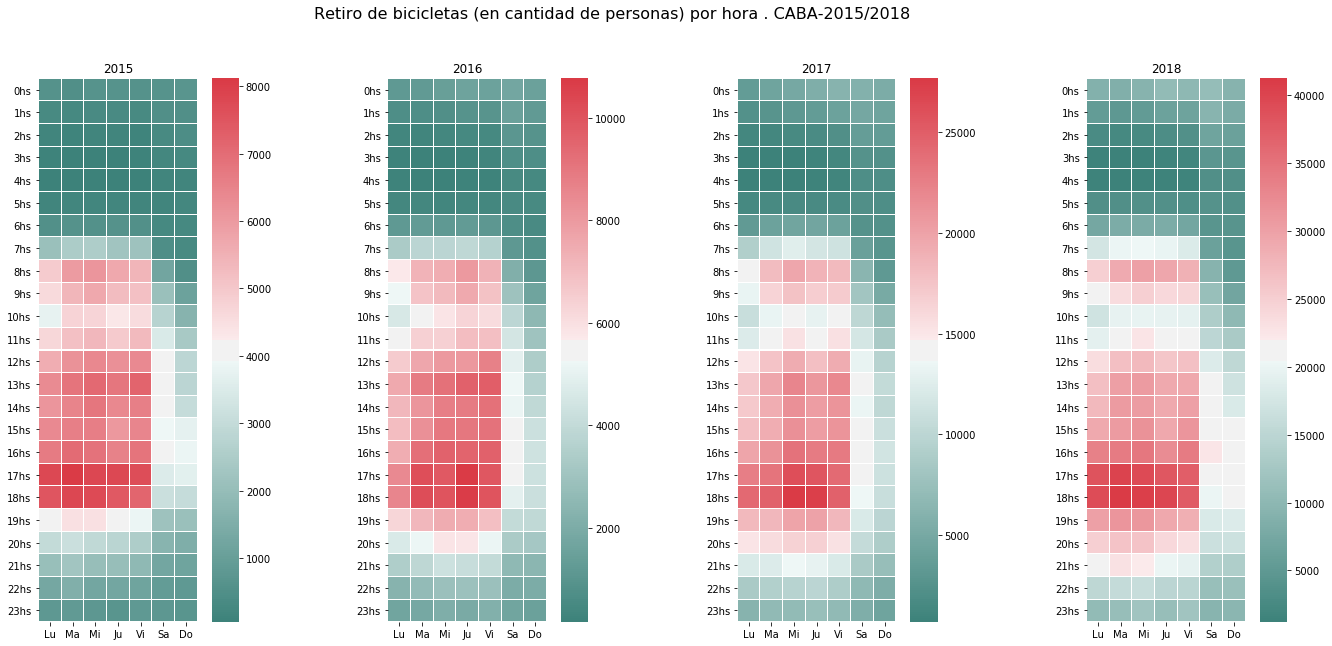

In [42]:
# Graficamos un heatmap con el equivalente a pivot2 (verticalmente!). Se grafican los años anteriores
fig = plt.figure(figsize=(24,10))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

#2015
sns.heatmap(pivot15, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=360 )
ax1.set_ylabel("Hora del día", labelpad = 12)
labels1 = [item.get_text()+''+'hs' for item in ax1.get_yticklabels()]
ax1.set_yticklabels(labels,  rotation = 0)
ax1.set_ylabel("")
ax1.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax1.set_xlabel("")
ax1.set_title('2015', y=1.01)

#2016
sns.heatmap(pivot16, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax2)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=360 )
ax2.set_ylabel("Hora del día", labelpad = 12)
labels2 = [item.get_text()+''+'hs' for item in ax2.get_yticklabels()]
ax2.set_yticklabels(labels,  rotation = 0)
ax2.set_ylabel("")
ax2.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax2.set_xlabel("")
ax2.set_title('2016', y=1.01)

#2017
sns.heatmap(pivot17, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=360 )
ax3.set_ylabel("Hora del día", labelpad = 12)
labels3 = [item.get_text()+''+'hs' for item in ax3.get_yticklabels()]
ax3.set_yticklabels(labels,  rotation = 0)
ax3.set_ylabel("")
ax3.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax3.set_xlabel("")
ax3.set_title('2017', y=1.01)

#2018
sns.heatmap(pivot18, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax4)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=360 )
ax4.set_ylabel("Hora del día", labelpad = 12)
labels4 = [item.get_text()+''+'hs' for item in ax4.get_yticklabels()]
ax4.set_yticklabels(labels,  rotation = 0)
ax4.set_ylabel("")
ax4.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax4.set_xlabel("")
ax4.set_title('2018', y=1.01)

fig.suptitle('Retiro de bicicletas (en cantidad de personas) por hora . CABA-2015/2018', fontsize=16) 
plt.show();

In [43]:
# Comparamos para el mismo año un meses más calurosos y más fríos

# Creamos una funcion para devolver el año y filtrar en cada dataframe por mes
def mes(df):
    mes = pd.to_datetime(df.bici_Fecha_hora_retiro).dt.month
    df['mes'] = mes
    return df

df17b = mes(df['17'].copy())
df18b = mes(df['18'].copy())

Generamos las tablas pivot para meses de calor y frio en cada año

In [44]:
#2017 - meses de frio
pivot17f = pd.pivot_table(data=df17b.loc[(df17b['mes']>=6) & (df17b['mes']<=8)], 
                          values="bici_sexo",index=pd.to_datetime(df17b.bici_Fecha_hora_retiro).dt.hour, 
                          columns=pd.to_datetime(df17b.bici_Fecha_hora_retiro).dt.weekday, 
                          aggfunc = 'count',fill_value=0)

#2017 - meses de calor
pivot17c = pd.pivot_table(data=df17b.loc[(df17b['mes']>=9) & (df17b['mes']<=11)], 
                          values="bici_sexo",index=pd.to_datetime(df17b.bici_Fecha_hora_retiro).dt.hour, 
                          columns=pd.to_datetime(df17b.bici_Fecha_hora_retiro).dt.weekday, 
                          aggfunc = 'count',fill_value=0)

#2018 - meses de frio
pivot18c = pd.pivot_table(data=df18b.loc[(df18b['mes']>=6) & (df18b['mes']<=8)], 
                          values="bici_sexo",index=pd.to_datetime(df18b.bici_Fecha_hora_retiro).dt.hour, 
                          columns=pd.to_datetime(df18b.bici_Fecha_hora_retiro).dt.weekday, 
                          aggfunc = 'count',fill_value=0)

#2018 - meses de calor
pivot18f = pd.pivot_table(data=df18b.loc[(df18b['mes']>=9) & (df18b['mes']<=11)], 
                          values="bici_sexo",index=pd.to_datetime(df18b.bici_Fecha_hora_retiro).dt.hour, 
                          columns=pd.to_datetime(df18b.bici_Fecha_hora_retiro).dt.weekday, 
                          aggfunc = 'count',fill_value=0)

Y graficamos un heatmap vertical con meses fríos y templados. 

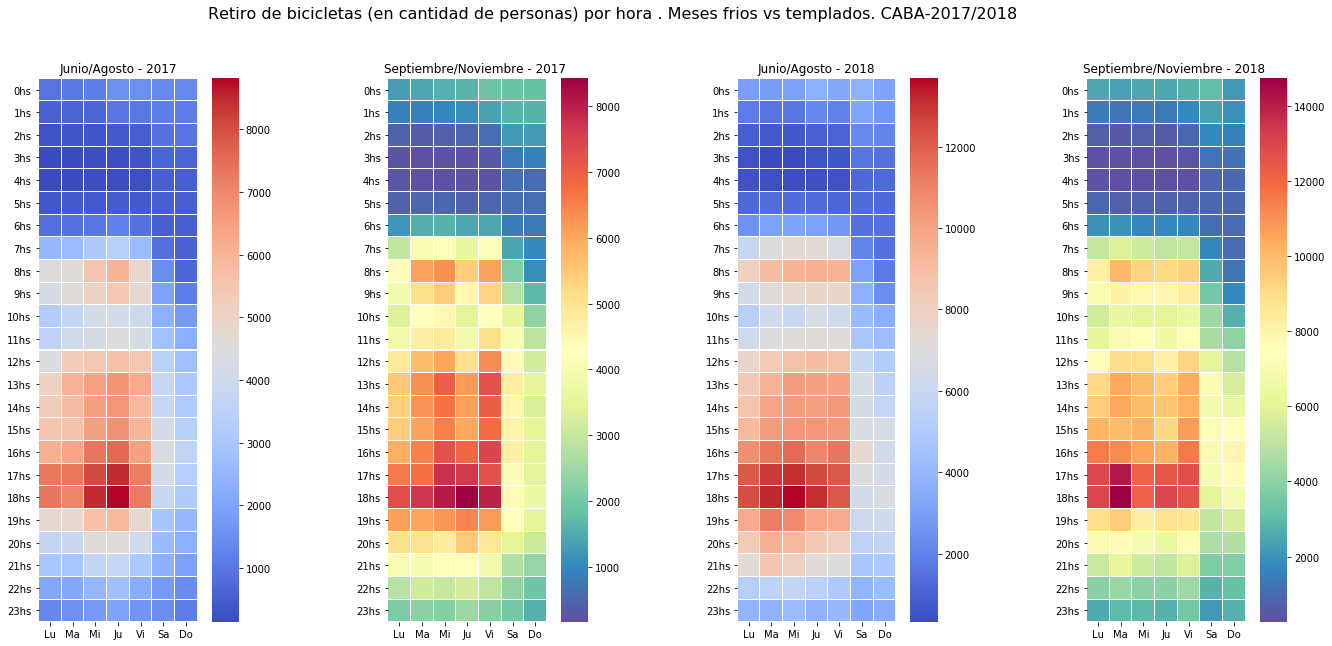

In [45]:
fig = plt.figure(figsize=(24,10))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

#2017 - meses de frio
sns.heatmap(pivot17f, square=True, cmap='coolwarm', linewidths=.1, ax = ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=360 )
ax1.set_ylabel("Hora del día", labelpad = 12)
labels1 = [item.get_text()+''+'hs' for item in ax1.get_yticklabels()]
ax1.set_yticklabels(labels1,  rotation = 0)
ax1.set_ylabel("")
ax1.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax1.set_xlabel("")
ax1.set_title('Junio/Agosto - 2017', y=1.01)

#2017 - meses de calor
sns.heatmap(pivot17c, square=True, cmap='Spectral_r', linewidths=.1, ax = ax2)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=360 )
ax2.set_ylabel("Hora del día", labelpad = 12)
labels2 = [str(int(i))+''+'hs' for i in pivot17c.index]
ax2.set_yticklabels(labels2,  rotation = 0)
ax2.set_ylabel("")
ax2.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax2.set_xlabel("")
ax2.set_title('Septiembre/Noviembre - 2017', y=1.01, x=0.55)

#2018 - meses de frio
sns.heatmap(pivot18f, square=True, cmap='coolwarm', linewidths=.1, ax = ax3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=360 )
ax3.set_ylabel("Hora del día", labelpad = 12)
labels3 = [item.get_text()+''+'hs' for item in ax3.get_yticklabels()]
ax3.set_yticklabels(labels3,  rotation = 0)
ax3.set_ylabel("")
ax3.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax3.set_xlabel("")
ax3.set_title('Junio/Agosto - 2018', y=1.01)

#2018 - meses de calor
sns.heatmap(pivot18c, square=True, cmap='Spectral_r', linewidths=.1, ax = ax4)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=360 )
ax4.set_ylabel("Hora del día", labelpad = 12)
#labels4 = [item.get_text()+''+'hs' for item in ax4.get_yticklabels()]
labels4 = [str(int(i))+''+'hs' for i in pivot18c.index]
ax4.set_yticklabels(labels4,  rotation = 0)
ax4.set_ylabel("")
ax4.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax4.set_xlabel("")
ax4.set_title('Septiembre/Noviembre - 2018', y=1.01, x=0.55)

fig.suptitle('Retiro de bicicletas (en cantidad de personas) por hora . Meses frios vs templados. CABA-2017/2018', fontsize=16) 
plt.show();

In [46]:
#!pip install plotly_express
import plotly_express as px

ModuleNotFoundError: No module named 'plotly_express'

In [ ]:
# Histograma con tiempo promedio de uso por dia de semana
px.histogram(df19b, x="dia_semana", y="bici_tiempo_uso", histfunc="avg")

In [ ]:
# Creamos la variable hora en un df al azar (2018)
df18b['hora'] = pd.to_datetime(df18b.bici_Fecha_hora_retiro).dt.hour

In [ ]:
# Valores agrupados para 2018 segun estacion y origen
z = df18b.groupby(['bici_nombre_estacion_origen','hora'])['bici_sexo'].count().reset_index()

In [ ]:
z.head()

In [ ]:
# Recuperamos del shape de estaciones la latitud y la longitud
estaciones['x'], estaciones['y']=estaciones.geometry.x, estaciones.geometry.y

In [ ]:
# Joineamos los valores de latitud y longitud al dataframe "z"
v = pd.merge(z,estaciones[['NOMBRE','x','y']], right_on='NOMBRE', left_on='bici_nombre_estacion_origen')

In [ ]:
# Este scatter muestra "por hora" la evolucion de la cantidad de usuarios por estacion (ubicada por lat y lon)
# Dato: conforme avanzan las horas, aumenta la cantidad de usuarios. Sobretodo a partir del mediodia

# Inquietud: clasificar color de puntos por barrio o algun otro parametro espacial (como si esta en microcentro o no)

px.scatter(v, x="x", y="y",size="bici_sexo", color="NOMBRE", hover_name="NOMBRE",
           animation_frame="hora", animation_group="NOMBRE", 
           labels=dict(x="Longitud", y="Latitud", NOMBRE = 'Estacion', hora = 'Hora', bici_sexo = 'Usuarios'))

In [ ]:
# Este scatter muestra "por hora" la evolucion de los minutos promedio de uso y de la edad promedio
# Curioso: conforme avanzan las horas los promedios (puntos) se aglomeran en las edades mas altas

# Dataframe
w1 = df18b.loc[df18b['bici_sexo']!='NO INFORMADO'].groupby(['bici_nombre_estacion_origen','hora','bici_sexo'])['bici_edad','bici_tiempo_uso'].mean().reset_index()

# Plot
px.scatter(w1, x="bici_edad", y="bici_tiempo_uso", 
           animation_frame="hora", animation_group="bici_nombre_estacion_origen",
           labels=dict(bici_edad="Edad media", bici_tiempo_uso="Tiempo medio de uso", NOMBRE = 'Estacion', hora = 'Hora', bici_sexo = 'Usuarios')
           )

# Inquietud: los puntos se aglomeran (menor dispersion) en edades y tiempos medios de uso mas chicos. Presumiblementte es gente que usa la bici para ir y volver del laburo (porque son tiempos de uso mas cortos y franja etaria cercana a los treinta).
# Inquietud 2: clasificar el dataframe en "horario laboral" y "no laboral". Colorear los puntos en base a eso